In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Categorical Values

In [7]:
df.Gender.value_counts(dropna = False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [10]:
df.Married.value_counts(dropna = False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

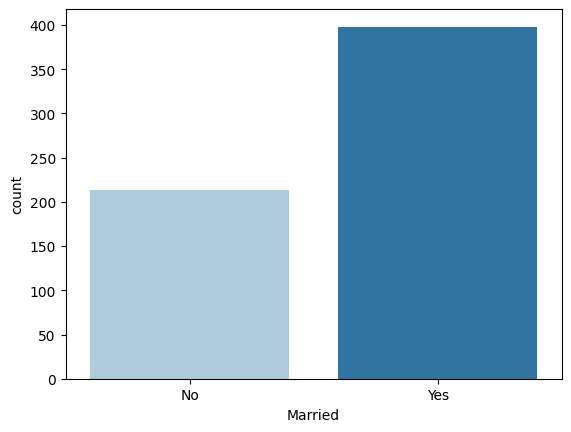

In [13]:
sns.countplot(x = 'Married', data = df, palette = 'Paired')
plt.show()

In [14]:
df.Education.value_counts(dropna = False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

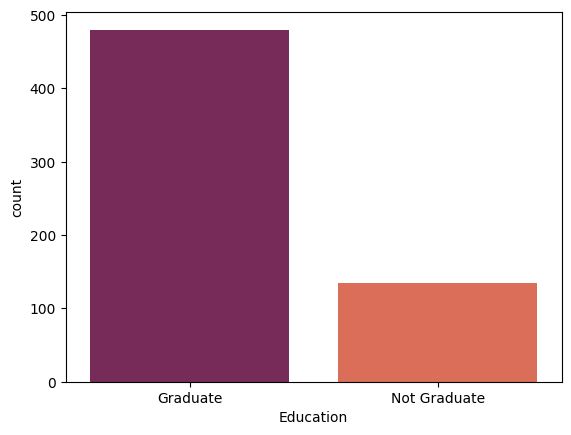

In [16]:
sns.countplot(x = 'Education', data = df, palette = 'rocket')
plt.show()

In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
df.Self_Employed.value_counts(dropna = False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

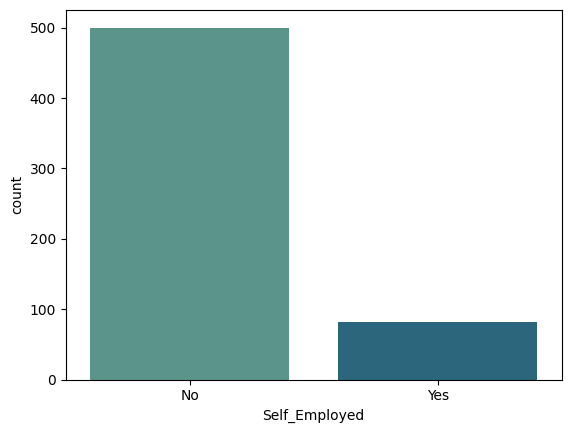

In [21]:
sns.countplot(x = 'Self_Employed', data = df, palette = 'crest')
plt.show()

In [22]:
df.Credit_History.value_counts(dropna = False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [23]:
df.Property_Area.value_counts(dropna = False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

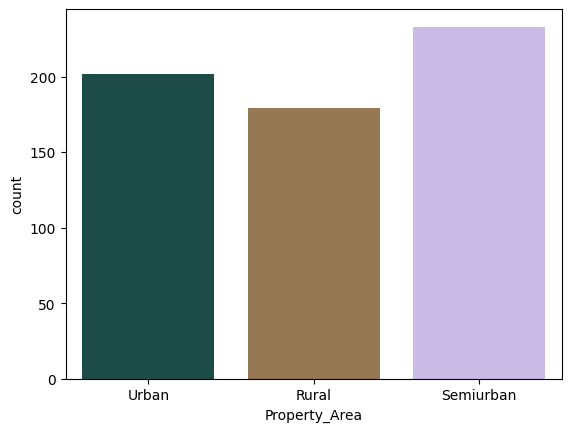

In [24]:
sns.countplot(x = 'Property_Area', data = df, palette = "cubehelix")

In [25]:
df.Loan_Status.value_counts(dropna= False)

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot: xlabel='Loan_Status', ylabel='count'>

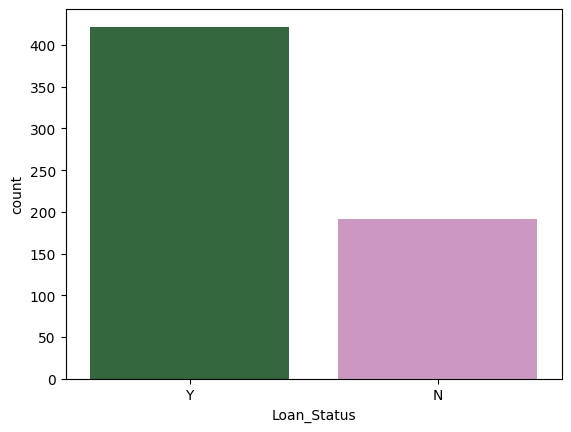

In [28]:
sns.countplot(x = 'Loan_Status', data = df, palette = "cubehelix")

In [30]:
df.Loan_Amount_Term.value_counts(dropna= False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot: xlabel='Loan_Amount_Term', ylabel='count'>

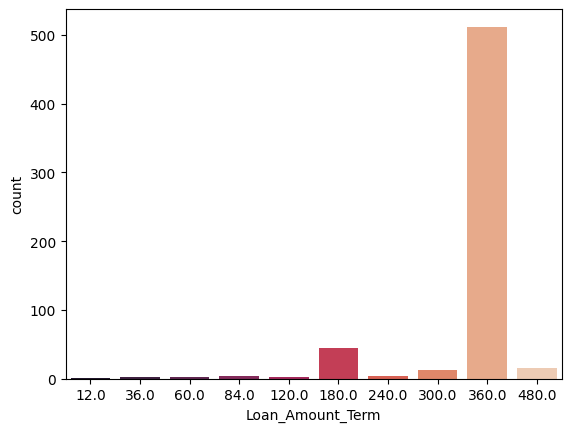

In [32]:
sns.countplot(x = 'Loan_Amount_Term', data= df, palette="rocket")

### Numerical

In [33]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

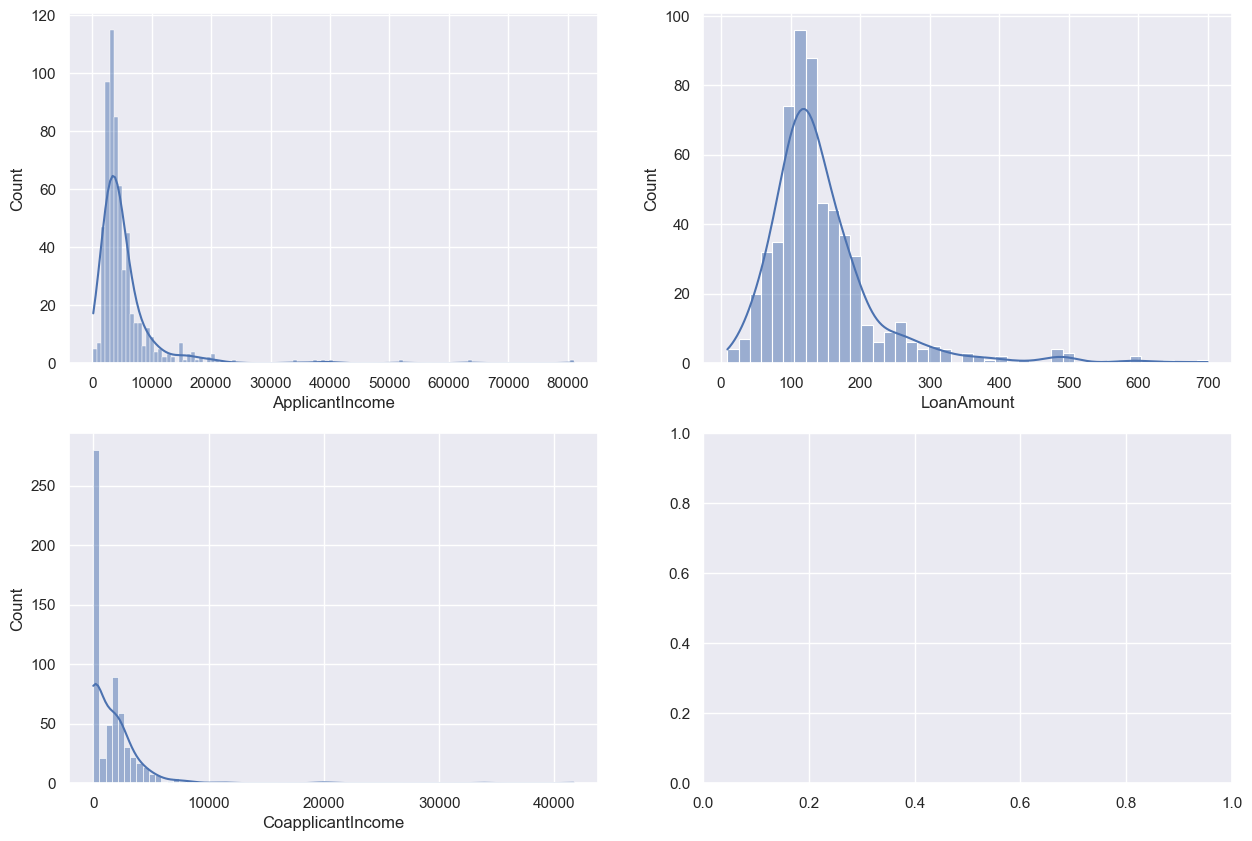

In [41]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(2,2,figsize=(15,10))

sns.histplot(data = df, kde= True, x = 'ApplicantIncome', ax = axs[0,0])
sns.histplot(data = df, kde= True, x = 'CoapplicantIncome', ax = axs[1,0])
sns.histplot(data = df, kde= True,x = 'LoanAmount', ax = axs[0,1])

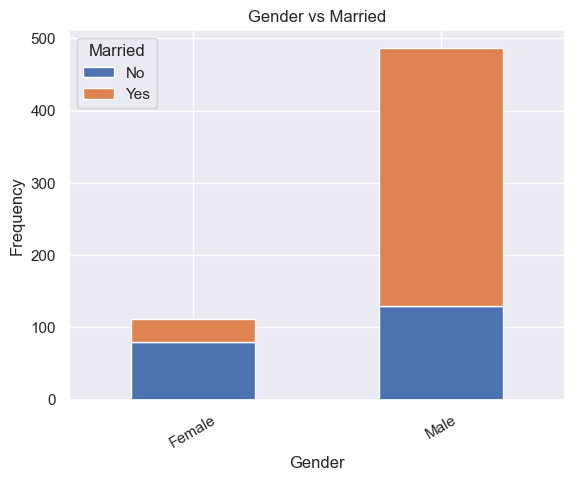

In [45]:
pd.crosstab(df.Gender, df.Married).plot(kind= "bar", stacked = True)
plt.title("Gender vs Married")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.xticks(rotation = 30)
plt.show()

In [47]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

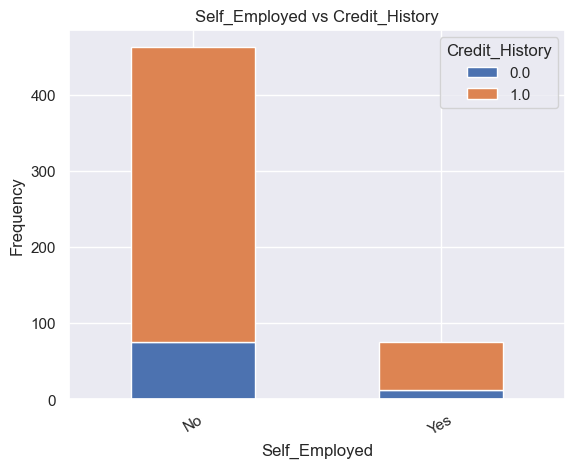

In [48]:
pd.crosstab(df.Self_Employed, df.Credit_History).plot(kind= "bar", stacked = True)
plt.title("Self_Employed vs Credit_History")
plt.xlabel("Self_Employed")
plt.ylabel("Frequency")
plt.xticks(rotation = 30)
plt.show()

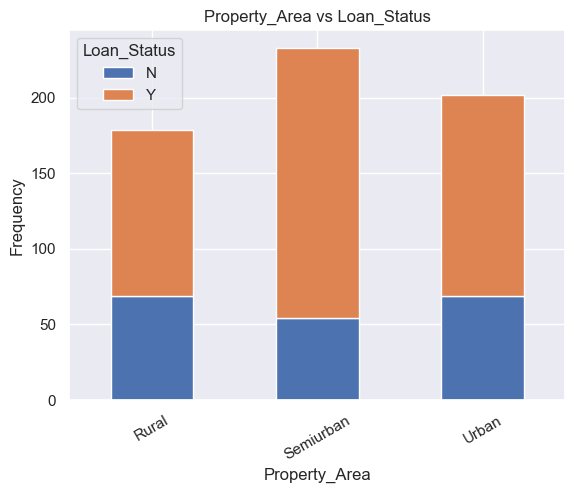

In [49]:
pd.crosstab(df.Property_Area, df.Loan_Status).plot(kind= "bar", stacked = True)
plt.title("Property_Area vs Loan_Status")
plt.xlabel("Property_Area")
plt.ylabel("Frequency")
plt.xticks(rotation = 30)
plt.show()

<AxesSubplot: xlabel='Loan_Status', ylabel='ApplicantIncome'>

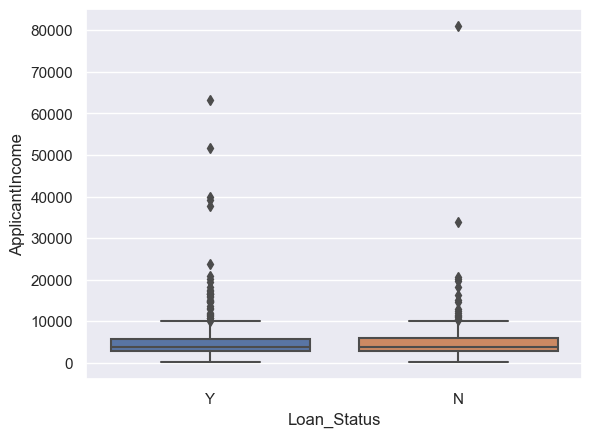

In [52]:
sns.boxplot(x= "Loan_Status", y ="ApplicantIncome", data = df)

## Preprocessing

In [58]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [55]:
df['Married'].mode()[0]

'Yes'

In [56]:
df['Dependents'].mode()[0]

'0'

In [57]:
df['Self_Employed'].mode()[0]

'No'

In [59]:
df['Credit_History'].mode()[0]

1.0

In [60]:
df['Credit_History'].mode()[0]

1.0

In [62]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [63]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [64]:
# drop unwanted
df = df.drop(['Loan_ID'], axis = 1)

In [65]:
pd.get_dummies(df)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


### Prevent multicollinearity

In [66]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [67]:
## remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Shewed Distribution
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

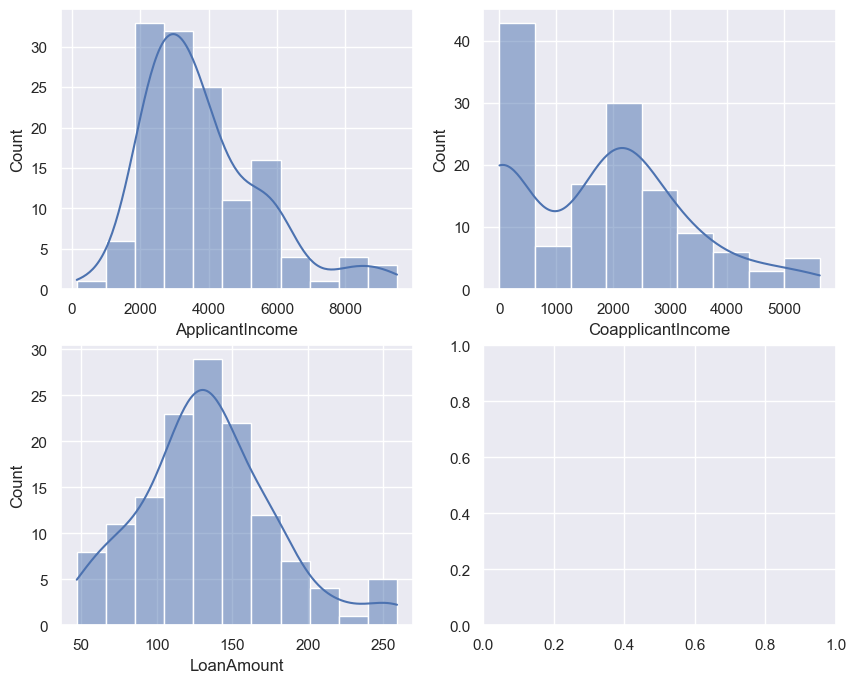

In [69]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0]);

### Separate Features

In [70]:
X = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']

## SMOTE for unbalanced Labels

In [73]:
!pip install imblearn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 330.3 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/257.7 kB 393.8 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/257.7 kB 393.8 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/257.7 kB 297.7 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/257.7 kB 297.7 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/257.7 kB 309.1 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/257.7 kB 328.2 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/257.7 kB 343.4 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/257.7 kB 355.0 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/257.7 kB 361.7 kB/s eta 0:00:01
   ---------------------------- --------- 194.6/257.7 kB 

In [74]:
from imblearn.over_sampling import SMOTE
X, y =SMOTE().fit_resample(X,y)

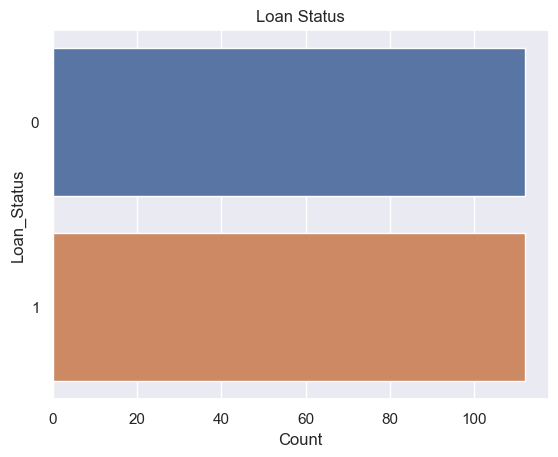

In [76]:
sns.countplot(y =y, data = df) 
plt.title("Loan Status")
plt.xlabel('Count')
plt.show()

In [78]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Logistic regression

####  'saga' (Stochastic Average Gradient Descent with Momentum) 
solver is an algorithm used to find the optimal model parameters (coefficients) that minimize the loss function (error) of the model.



In [86]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

LR = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)



In [88]:
print(confusion_matrix(y_test, y_pred))
print("########################")
print(accuracy_score(y_test, y_pred)* 100)
print("########################")
print(classification_report(y_test, y_pred))

[[18  5]
 [ 3 19]]
########################
82.22222222222221
########################
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.79      0.86      0.83        22

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45



# SVM

Radial Basis Function (RBF). The kernel function plays a crucial role in SVM as it transforms the input data into a higher-dimensional space where it might be easier to separate the classes using a hyperplane.

In [90]:
from sklearn.svm import SVC
SVM  = SVC(kernel='rbf', max_iter=500)
SVM.fit(X_train, y_train)

y_pred = SVM.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.84      0.95      0.89        22

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

[[19  4]
 [ 1 21]]
SVC accuracy: 88.89%
